## Scatter plots and jittering
There are three different way to use jitter

In [3]:
library(ggplot2)

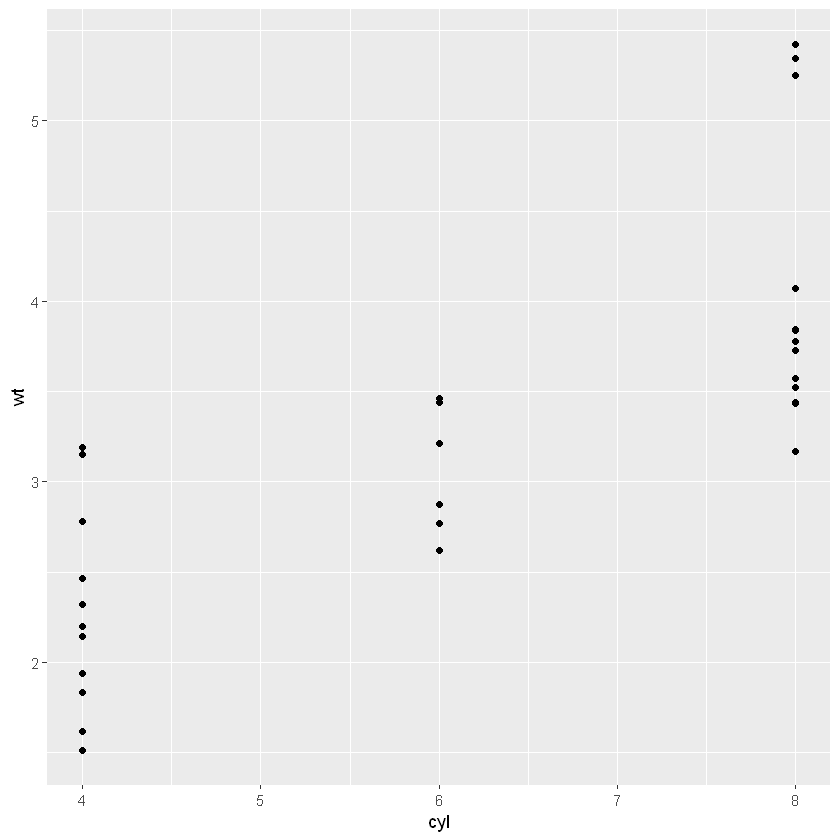

In [4]:
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_point()

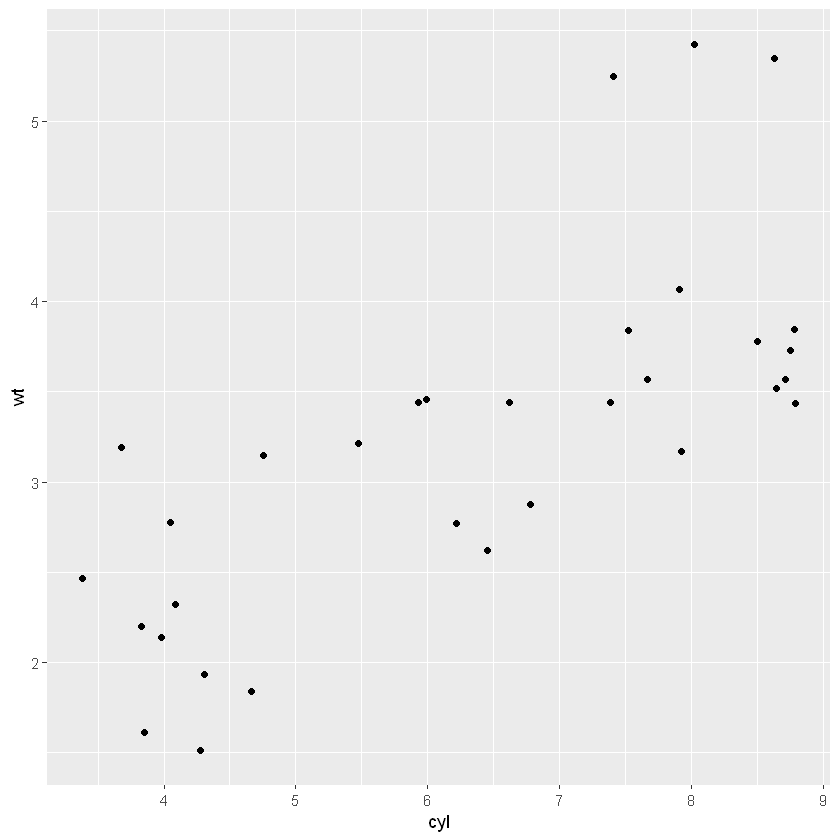

In [5]:
# 1 - With geom_jitter()
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_jitter()

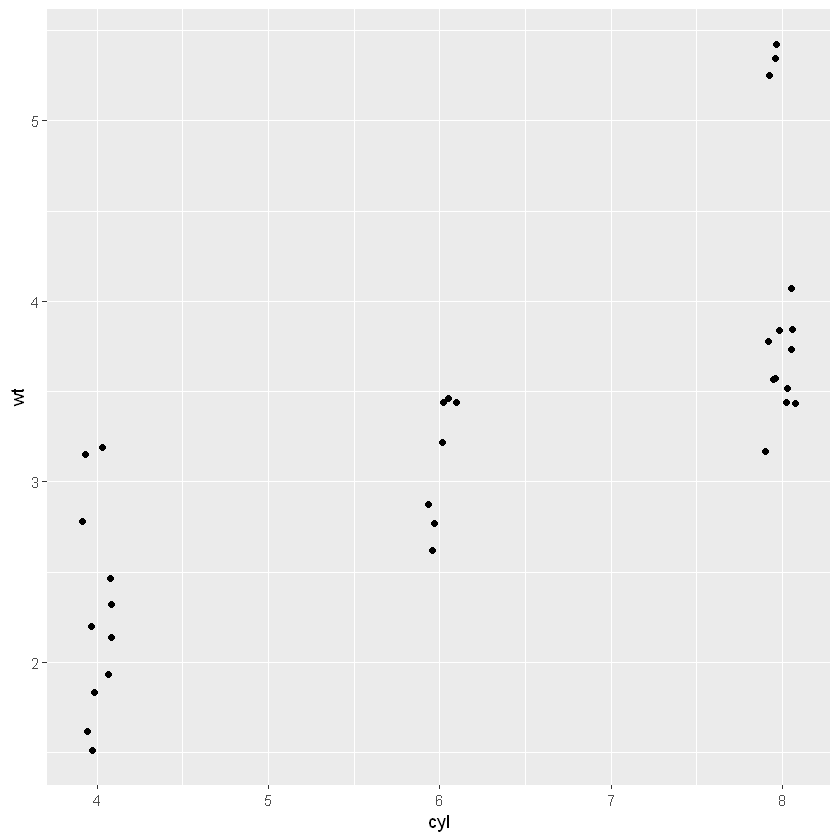

In [6]:
# 2 - Set width in geom_jitter()
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_jitter(width = 0.1)

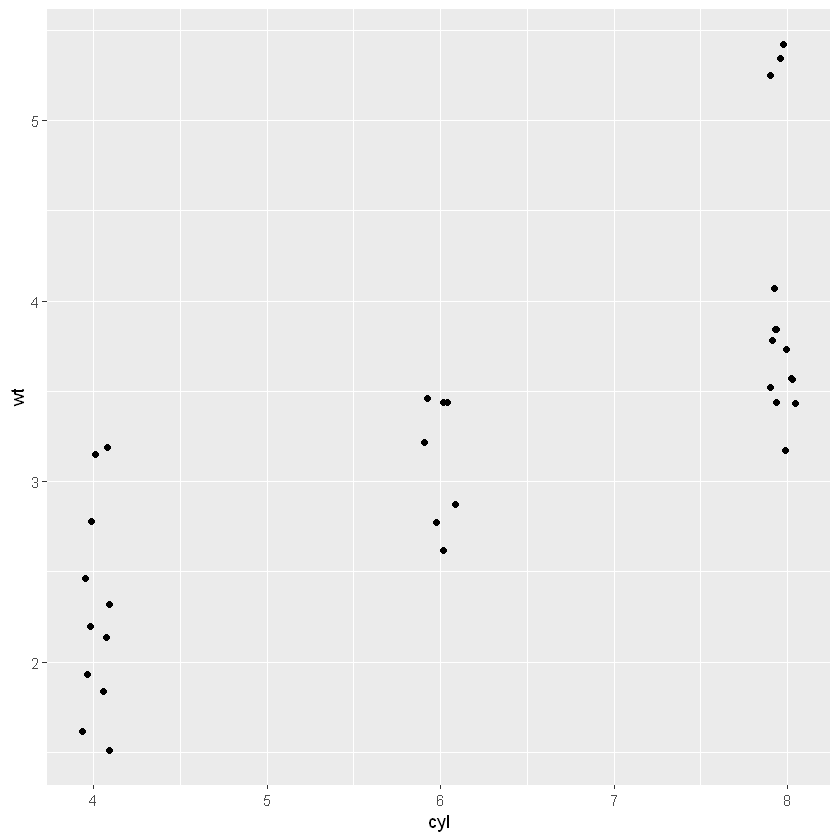

In [7]:
# 3 - Set position = position_jitter() in geom_point() ()
ggplot(mtcars, aes(x = cyl, y = wt)) +
  geom_point(position = position_jitter(0.1))

## Histogram
*The x axis/aesthetic:* The documentation for geom_histogram() states the argument stat = "bin" as a default. The histograms cut up a continuous variable into discrete bins - that's what the stat "bin" is doing. You always get 30 evenly-sized bins by default, which is specified with the default argument binwidth = range/30. 
<br> *The y axis/aesthetic:* geom_histogram() only requires one aesthetic: x. The variable mapped to the y aesthetic, is called ..count... When geom_histogram() executed the binning statistic, it not only cut up the data into discrete bins, but it also counted how many values are in each bin. So there is an internal data frame where this information is stored. The .. calls the variable count from this internal data frame. In this internal data frame is also the density calculated. This is the proportional frequency of the bin in relation to the whole data set. You use ..density.. to access this information.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


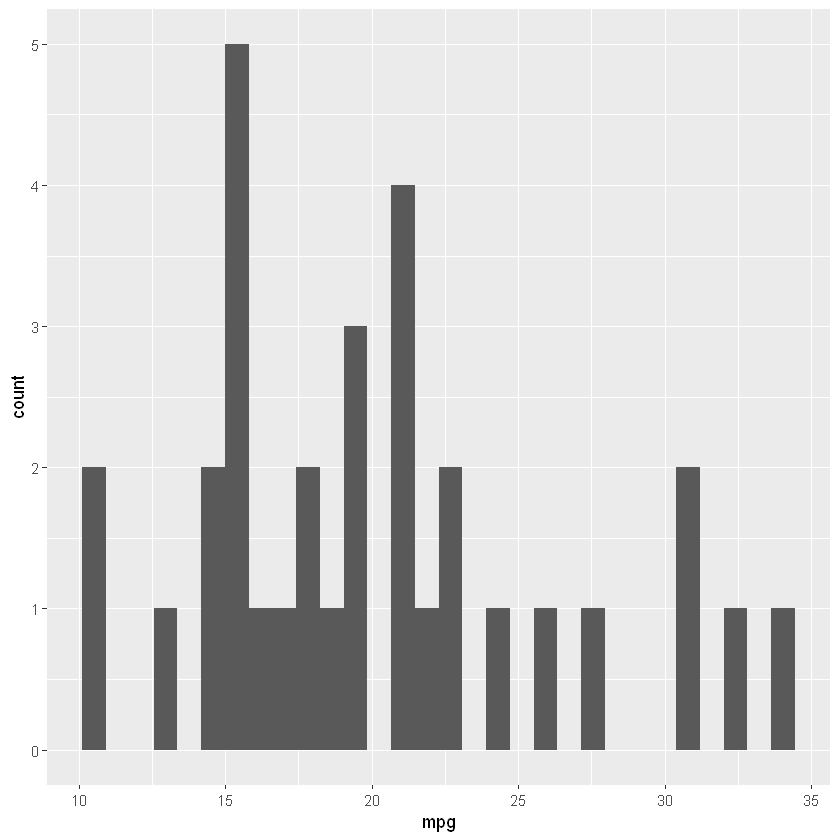

In [10]:
# Make a univariate histogram
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram()

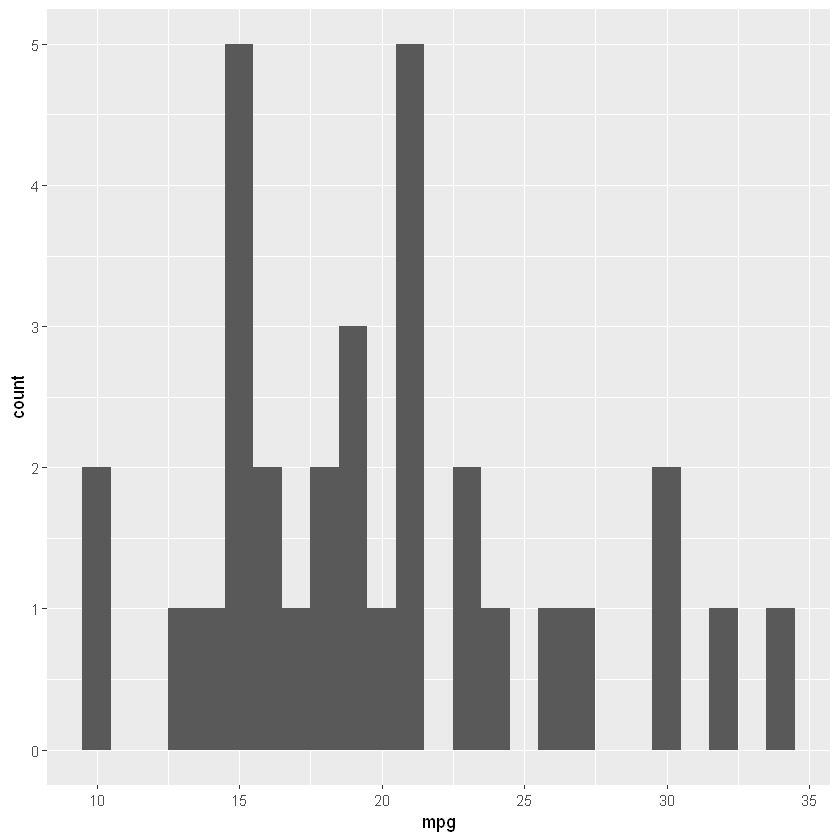

In [11]:
# Plot 1, plus set binwidth to 1 in the geom layer
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(binwidth = 1)

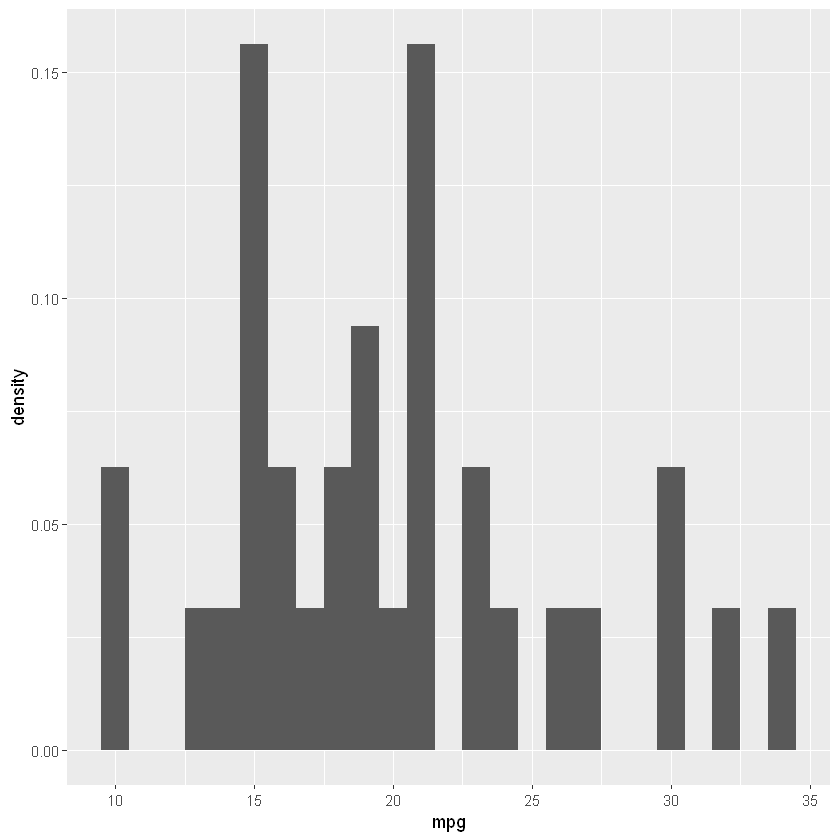

In [12]:
# 3 - Plot 2, plus MAP ..density.. to the y aesthetic (i.e. in a second aes() function)
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(aes(y = ..density..), binwidth = 1)

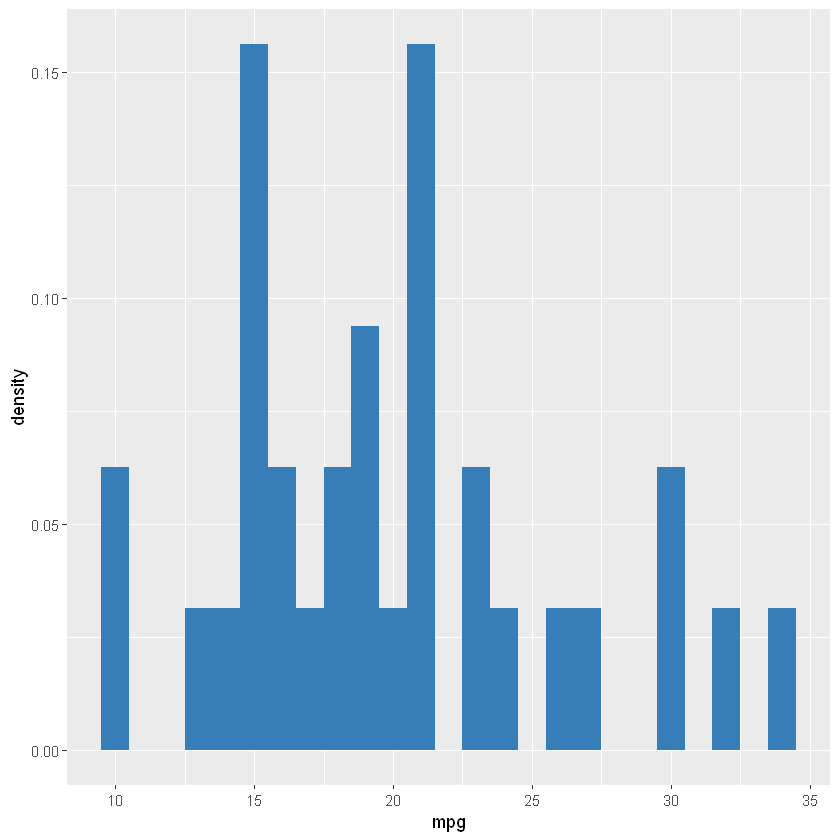

In [13]:
# 4 - plot 3, plus SET the fill attribute to "#377EB8"
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(aes(y = ..density..), fill = "#377EB8", binwidth = 1)

## geoms
Geoms also have a **position** argument, which you can use to specify how to draw the bars of the plot.

Three position arguments are:

    stack: place the bars on top of each other. Counts are used. This is the default position.
    fill: place the bars on top of each other, but this time use proportions.
    dodge: place the bars next to each other. Counts are used.

In [37]:
mtcars$am <- as.factor(mtcars$am)

In [36]:
mtcars$cyl <- as.factor(mtcars$cyl)

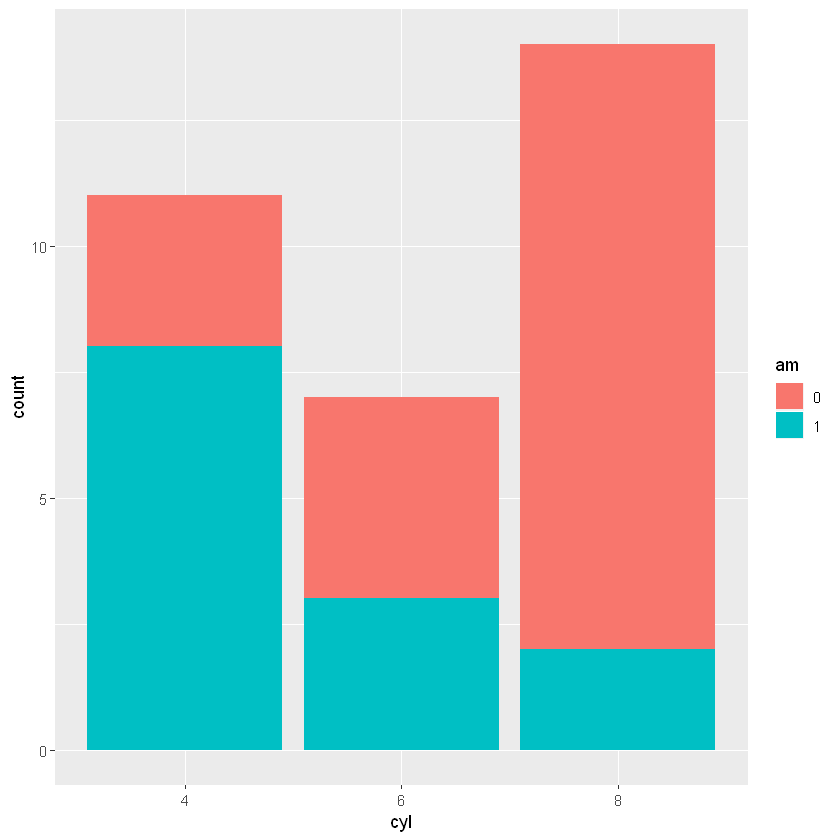

In [41]:
# Draw a bar plot of cyl, filled according to am
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar()

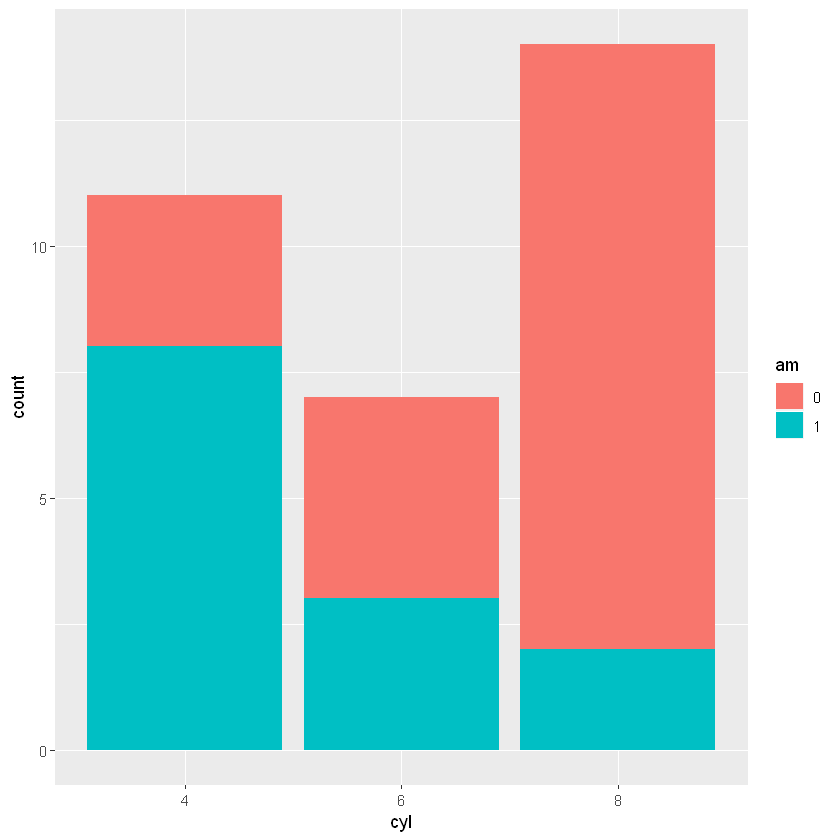

In [42]:
# Change the position argument to stack
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "stack")


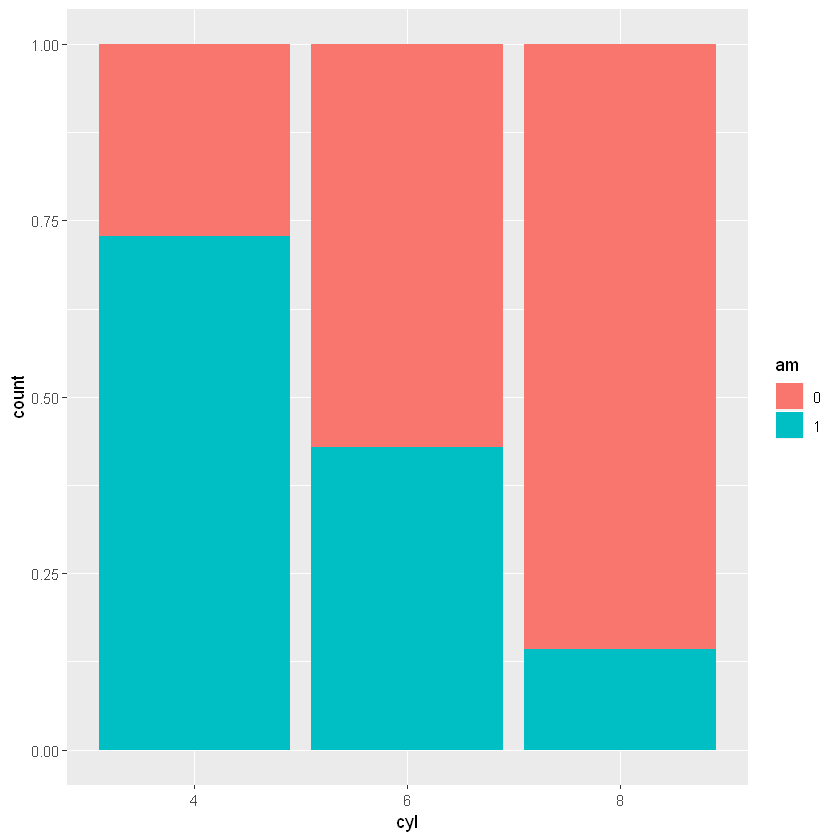

In [43]:
# Change the position argument to fill
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "fill")

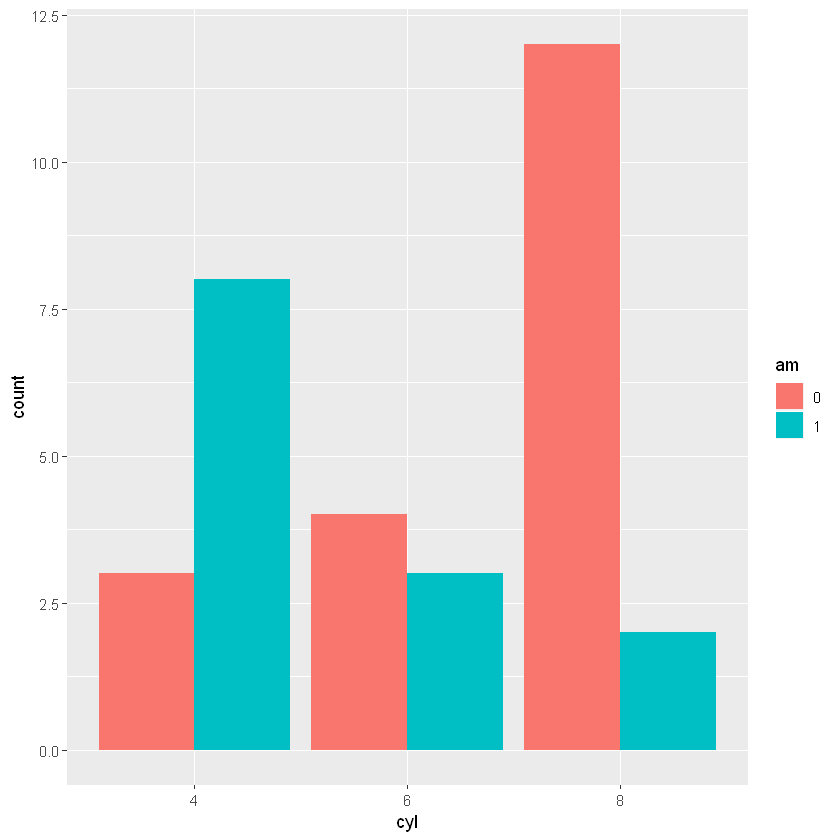

In [44]:
# Change the position argument to dodge
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "dodge")

## Overlapping bar plots
There are three different positions for bar plots: stack (the default), dodge (preferred), and fill (to show proportions).

You can also adjust the dodging, so that your bars partially overlap each other. 
Instead of using position = "dodge" we will use position_dodge().
The reason to use position_dodge() (and position_jitter()) is to specify how much dodging (or jittering) you want.

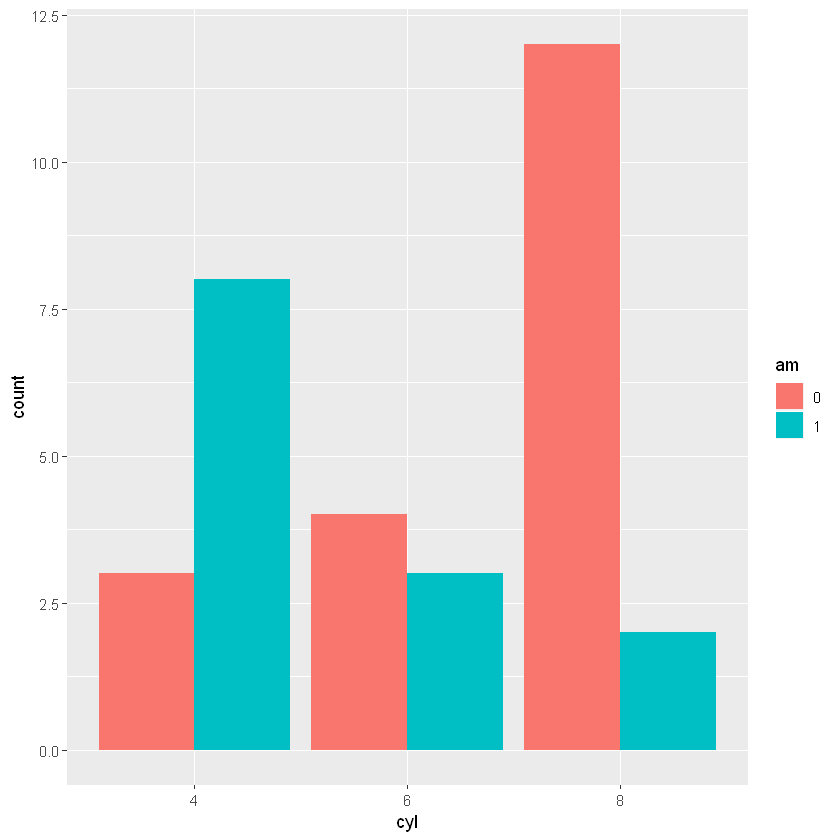

In [45]:
# 1 - The last plot form the previous exercise
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "dodge")

In [22]:
# 2 - Define posn_d with position_dodge()
posn_d <- position_dodge(width = 0.2)

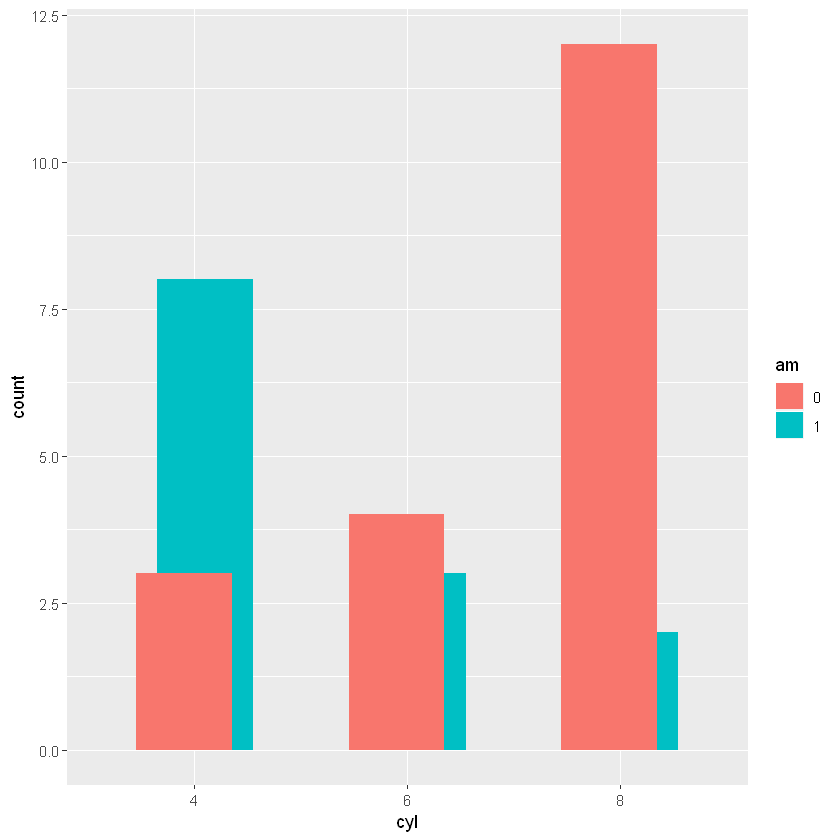

In [46]:
# 3 - Change the position argument to posn_d
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = posn_d)

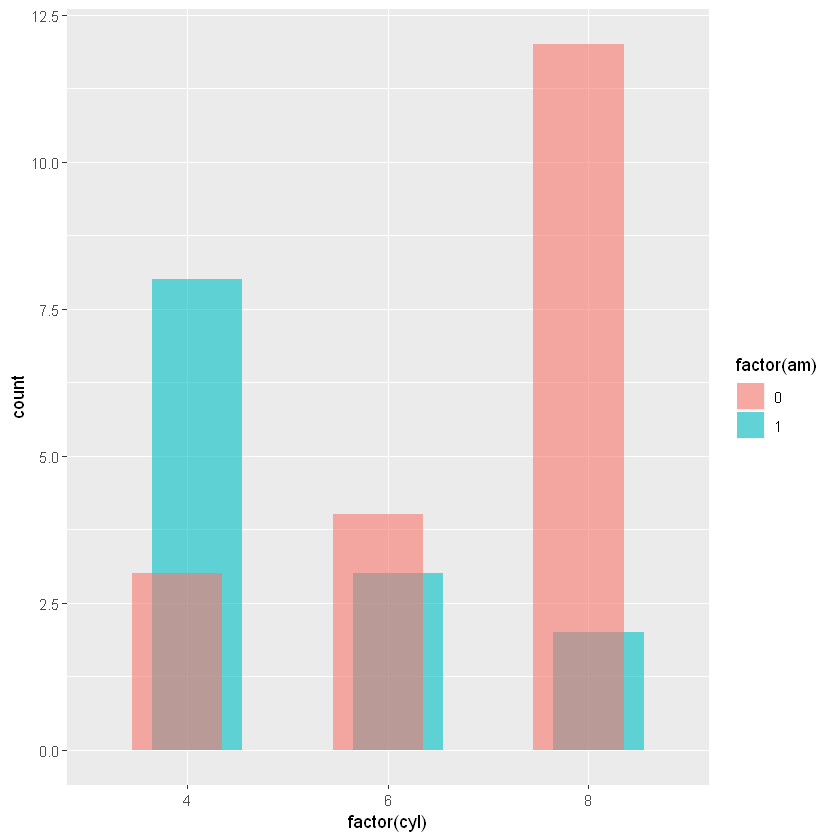

In [28]:
# 4 - Use posn_d as position and adjust alpha to 0.6
ggplot(mtcars, aes(x = factor(cyl), fill = factor(am))) +
  geom_bar(position = posn_d, alpha = 0.6)

## Overlapping histograms

Overlapping histograms pose similar problems to overlapping bar plots, but there is a unique solution here: a frequency polygon.

This is a geom specific to binned data that draws a line connecting the value of each bin. Like geom_histogram(), it takes a binwidth argument and by default stat = "bin" and position = "identity".

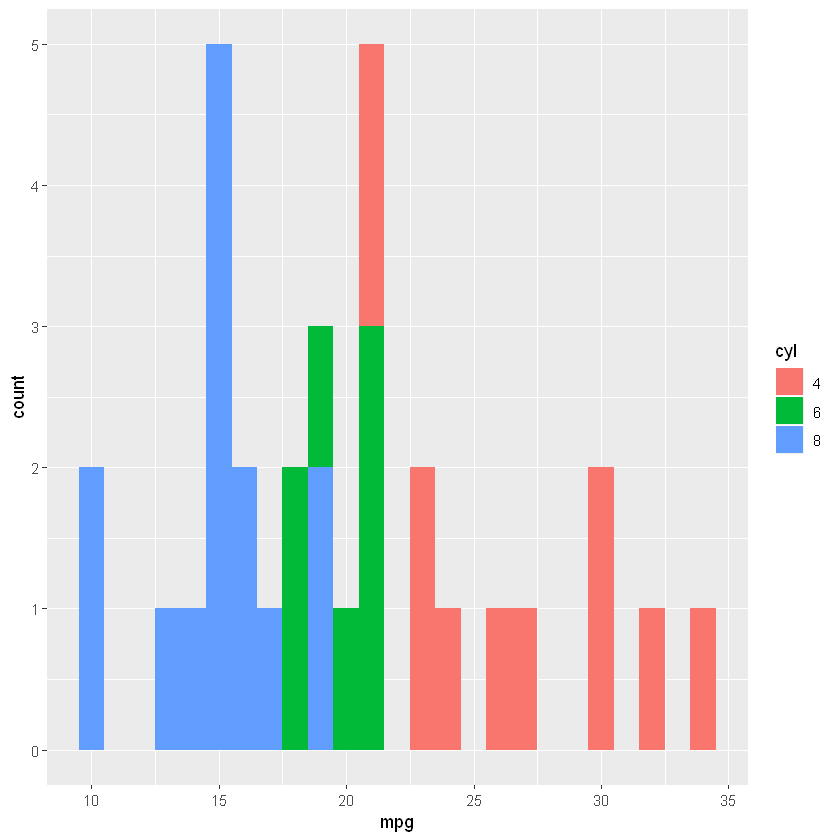

In [47]:
# A basic histogram, add coloring defined by cyl
ggplot(mtcars, aes(mpg, fill = cyl)) +
  geom_histogram(binwidth = 1)

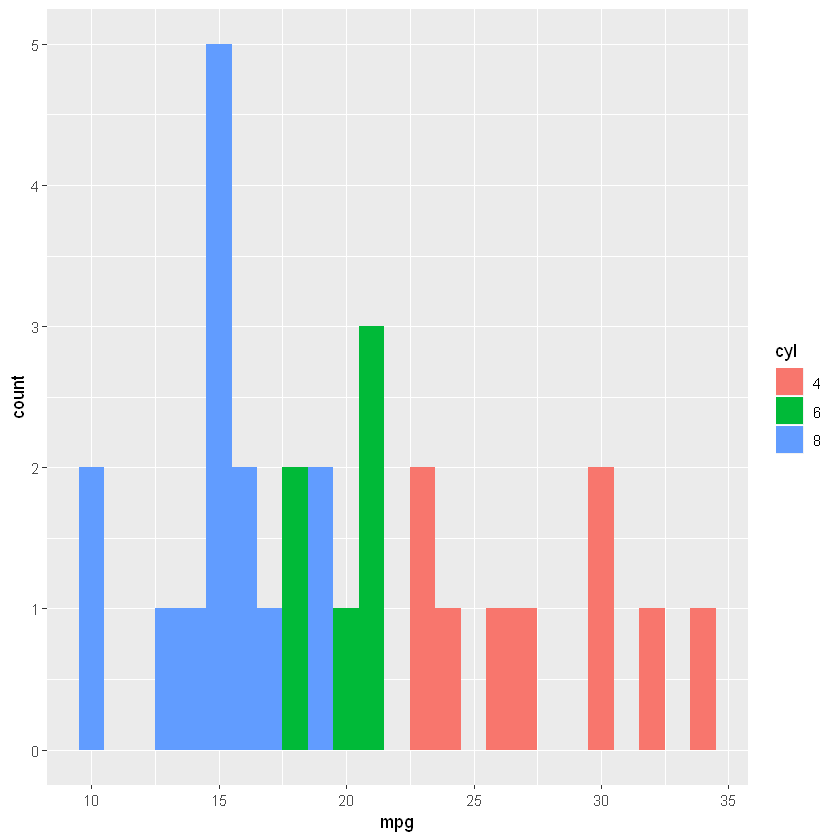

In [48]:
# Change position to identity
ggplot(mtcars, aes(mpg, fill = cyl)) +
  geom_histogram(position = "identity", binwidth = 1)

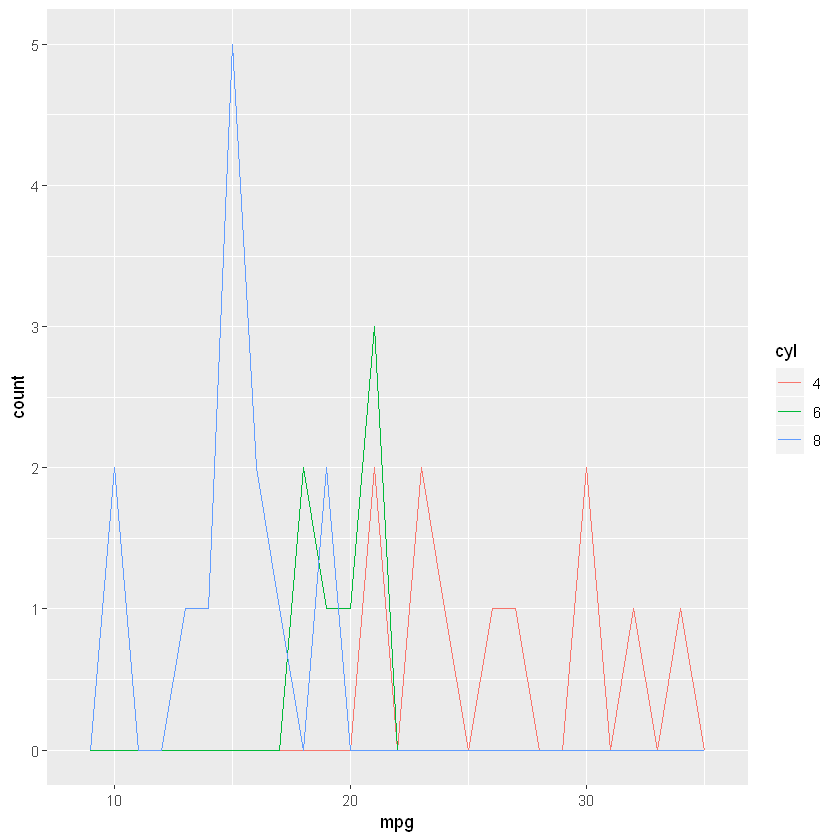

In [49]:
# Change geom to freqpoly (position is identity by default)
ggplot(mtcars, aes(mpg, color = cyl)) +
  geom_freqpoly(position = "identity", binwidth = 1)

## Bar plots with color ramp

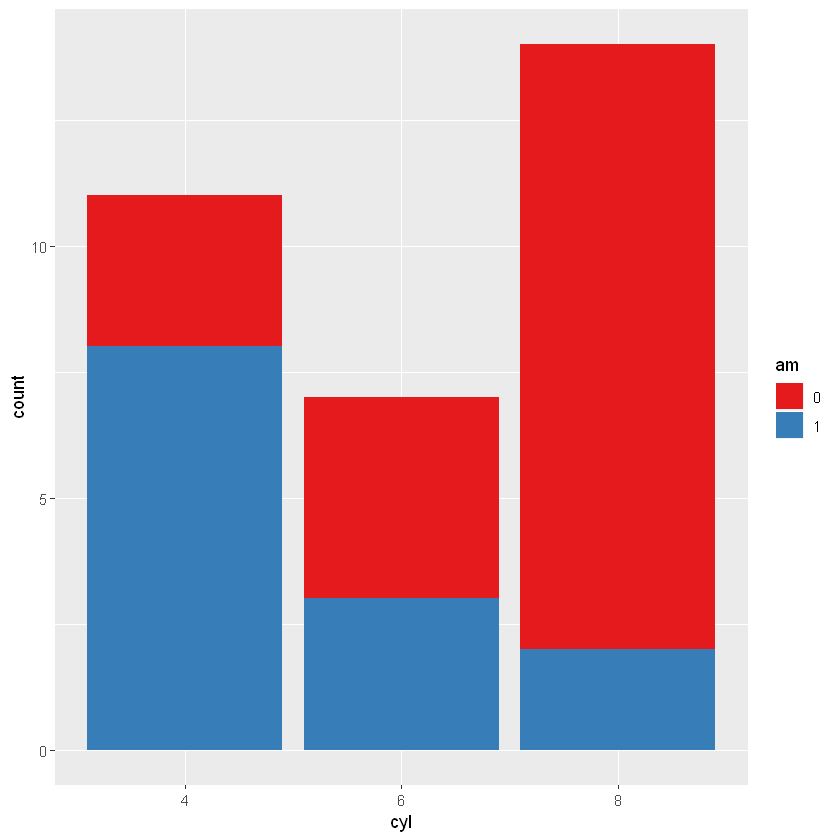

In [50]:
ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar() +
  scale_fill_brewer(palette = "Set1")

## Overlapping histograms

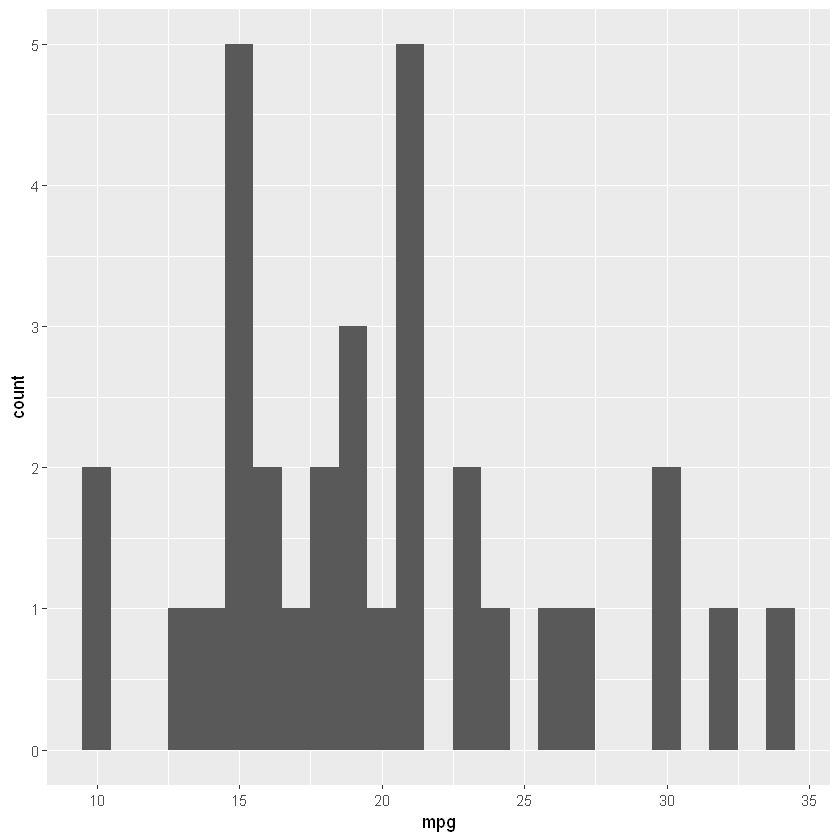

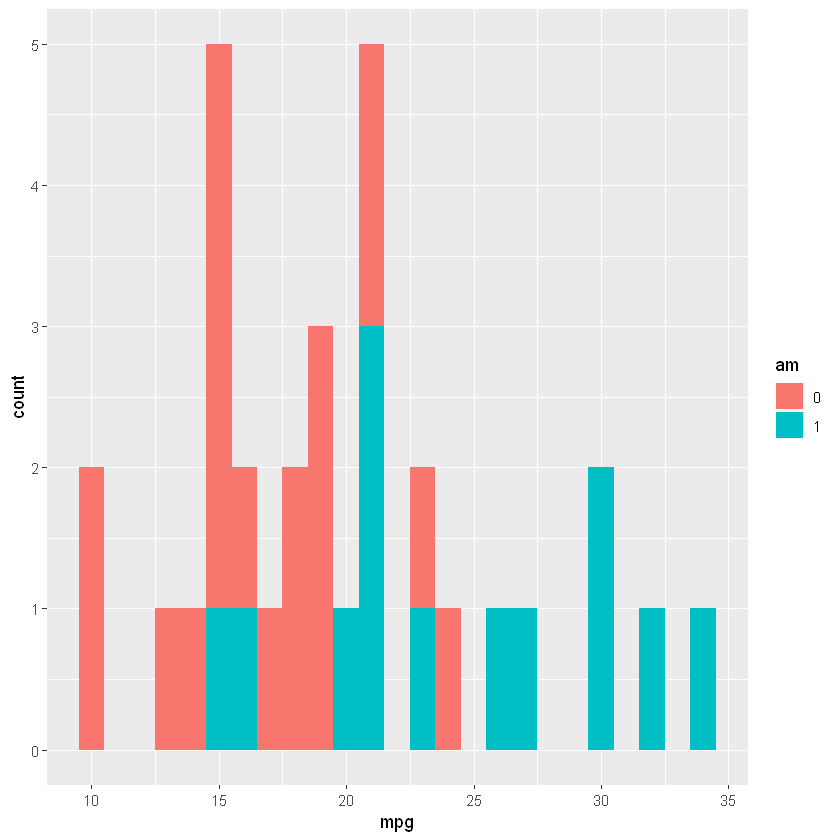

Warning message:
"Removed 16 rows containing missing values (geom_bar)."

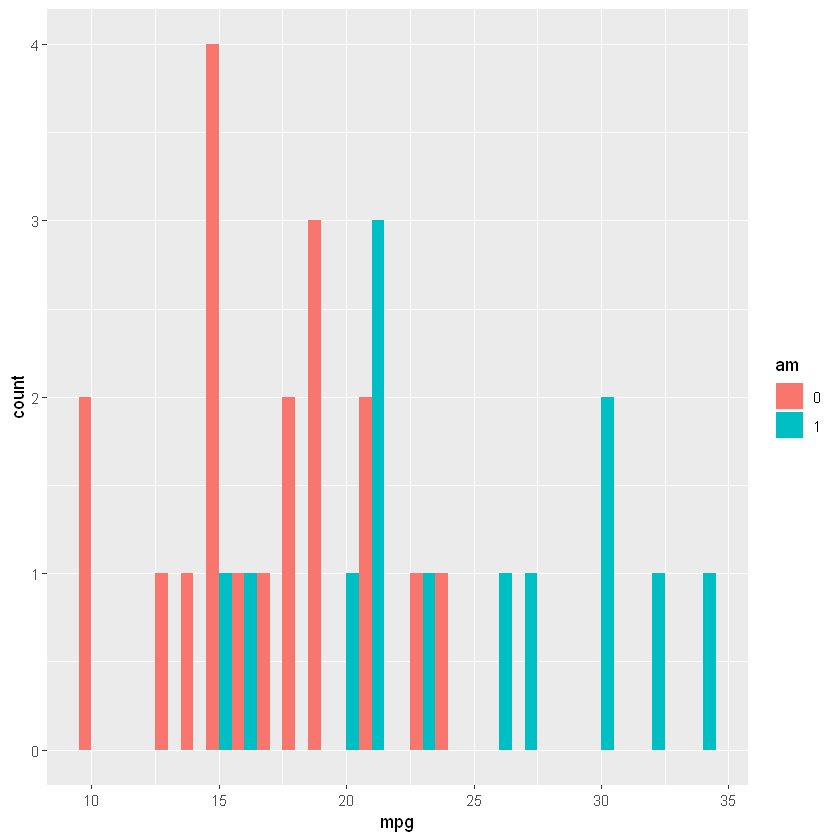

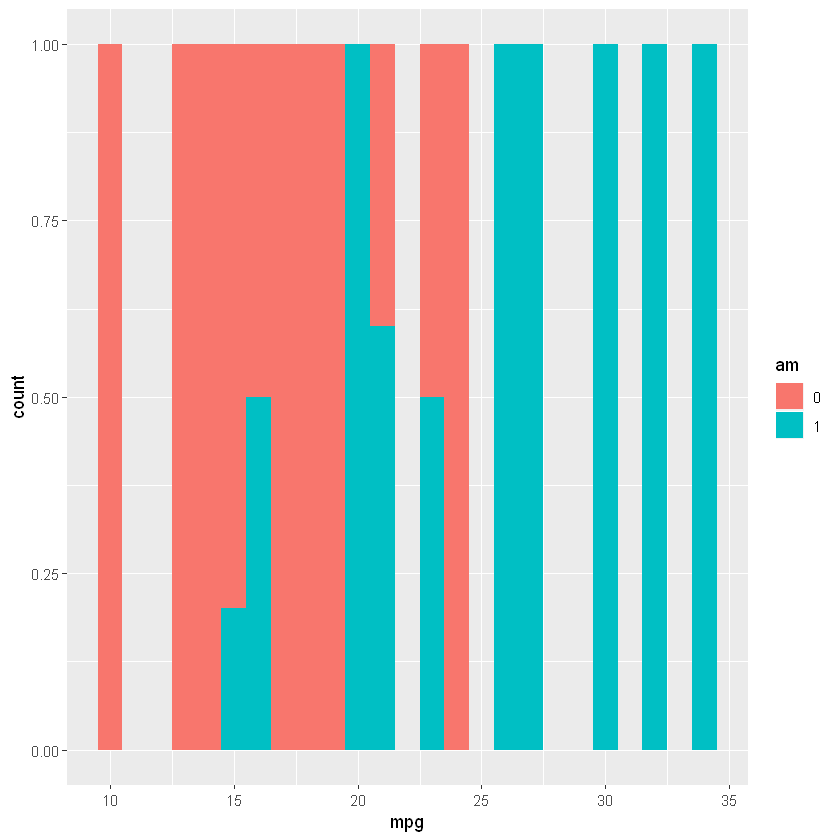

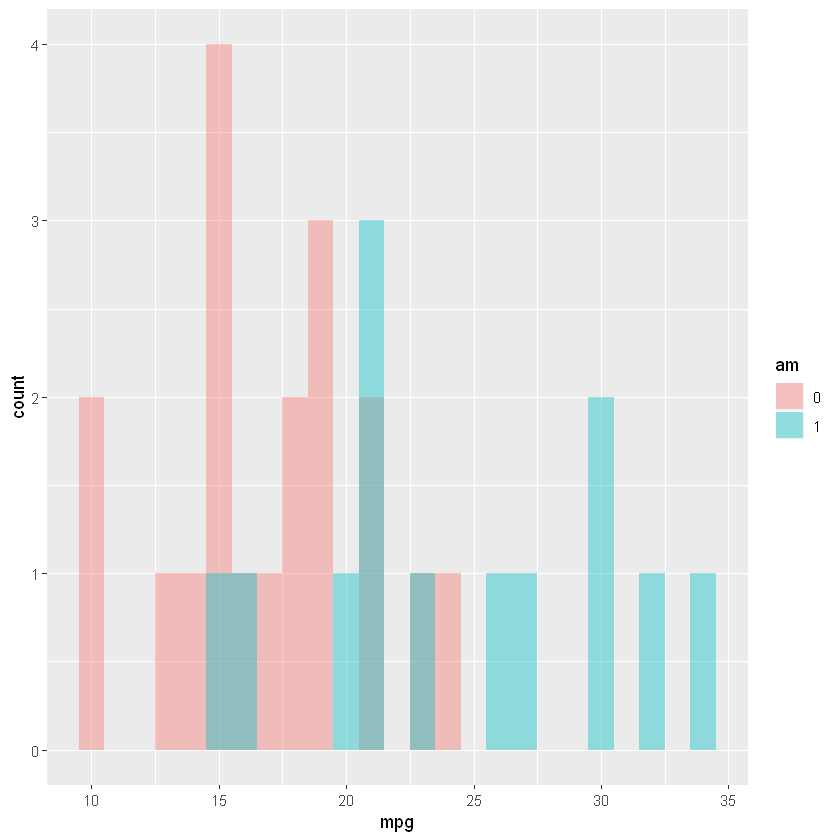

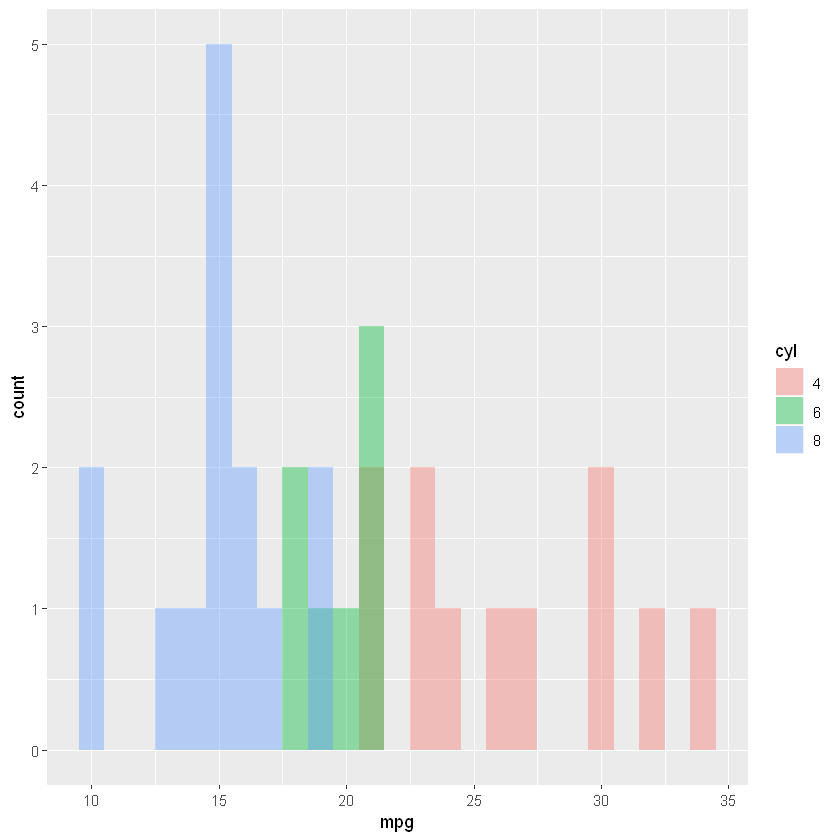

In [51]:
# 1 - Basic histogram plot command
ggplot(mtcars, aes(mpg)) +
  geom_histogram(binwidth = 1)

# 2 - Plot 1, Expand aesthetics: am onto fill
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1)



# 3 - Plot 2, change position = "dodge"
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1, position = "dodge")


# 4 - Plot 3, change position = "fill"
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1, position = "fill")


# 5 - Plot 4, plus change position = "identity" and alpha = 0.4
ggplot(mtcars, aes(mpg, fill = am)) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.4)



# 6 - Plot 5, plus change mapping: cyl onto fill
ggplot(mtcars, aes(mpg, fill = cyl)) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.4)


# Line plots

The economics data frame contains time series for unemployment and population statistics from the Federal Reserve Bank of St. Louis in the US. The data is contained in the ggplot2 package.

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


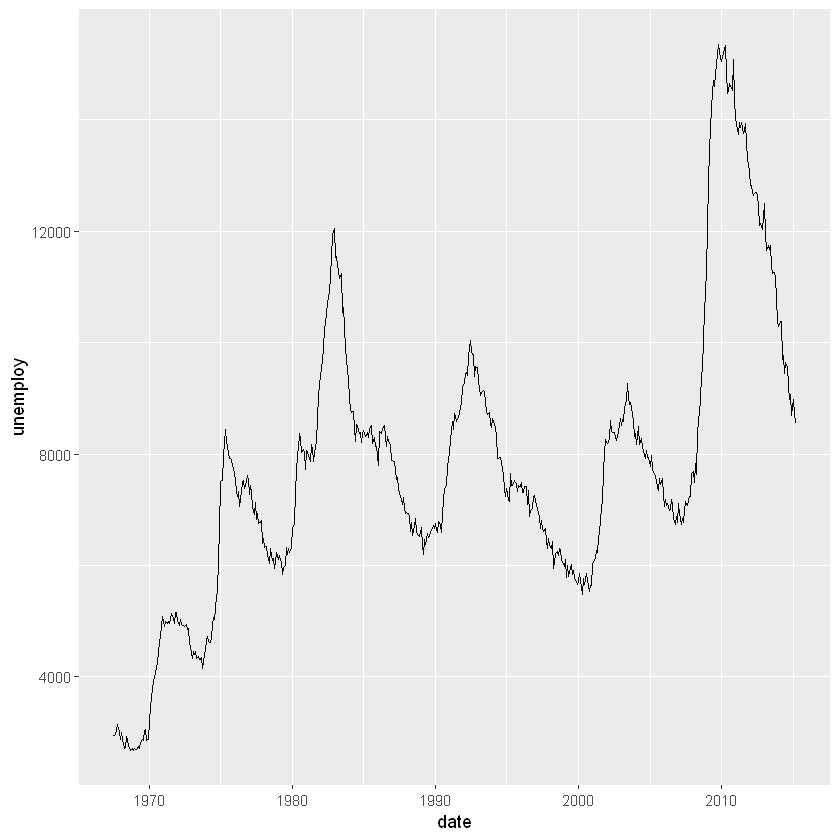

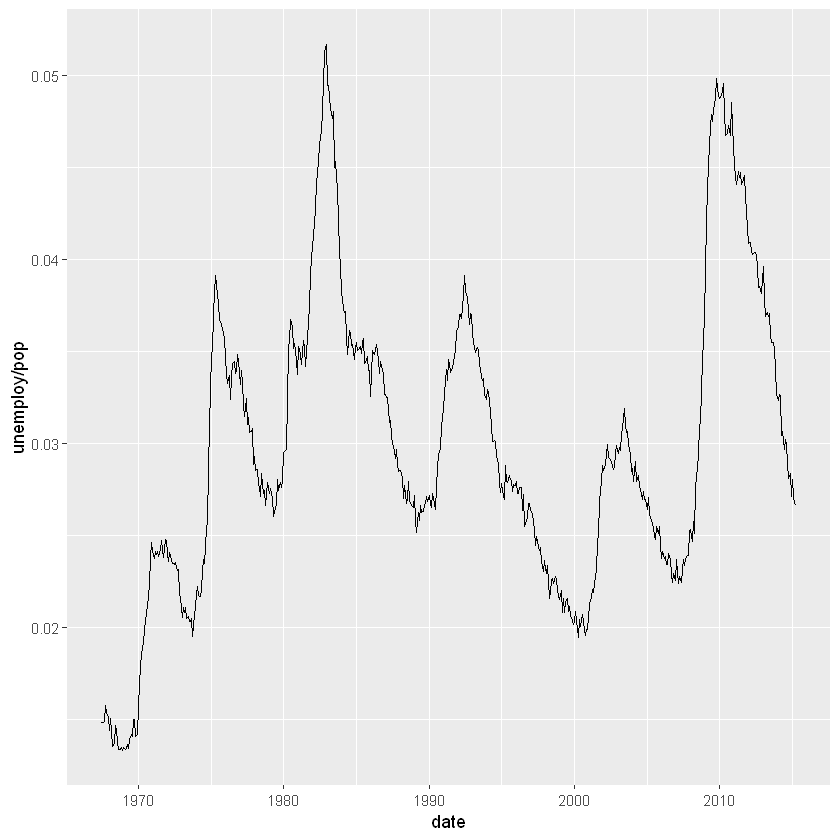

In [53]:
# Print out head of economics
head(economics, 2)

# Plot unemploy as a function of date using a line plot
ggplot(economics, aes(x = date, y = unemploy)) +
  geom_line()


# Adjust plot to represent the fraction of total population that is unemployed
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_line()

In [60]:
begin <- as.Date(c("1969-12-01", "1973-11-01", "1980-01-01", "1981-07-01", "1990-07-01", "2001-03-01"))
end <- as.Date(c("1970-11-01", "1975-03-01", "1980-07-01", "1982-11-01", "1991-03-01", "2001-11-01"))
recess <- data.frame(begin, end)
head(recess, 2)

begin,end
1969-12-01,1970-11-01
1973-11-01,1975-03-01


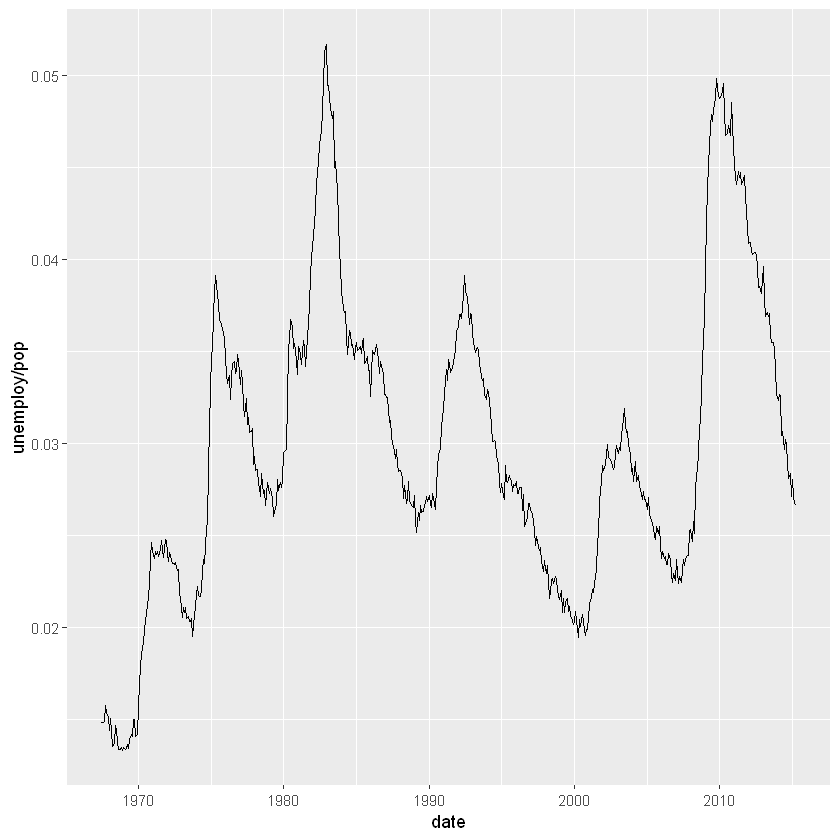

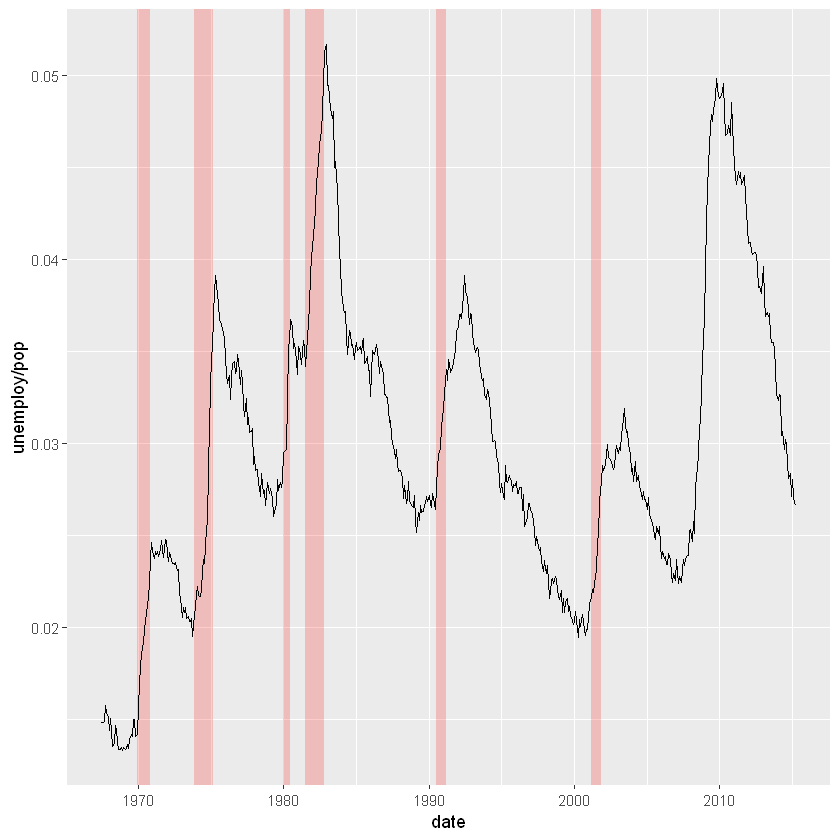

In [61]:
# Basic line plot
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_line()

# Expand the following command with geom_rect() to draw the recess periods
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_rect(data = recess,
         aes(xmin = begin, xmax = end , ymin = -Inf, ymax = +Inf),
         inherit.aes = FALSE, fill = "red", alpha = 0.2) +
  geom_line()

## gather 
gather() takes four arguments: the original data frame, the name of the key column, the name of the value column and the name of the grouping variable, with a minus in front. They can all be specified as object names (i.e. no "").

# base plot, ggplot and qplot

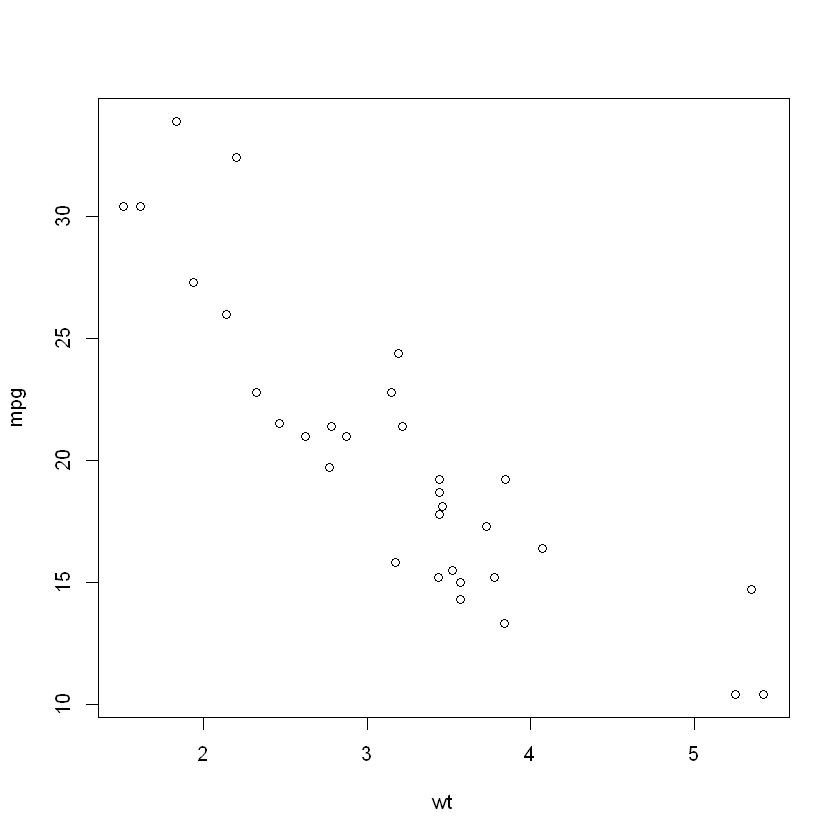

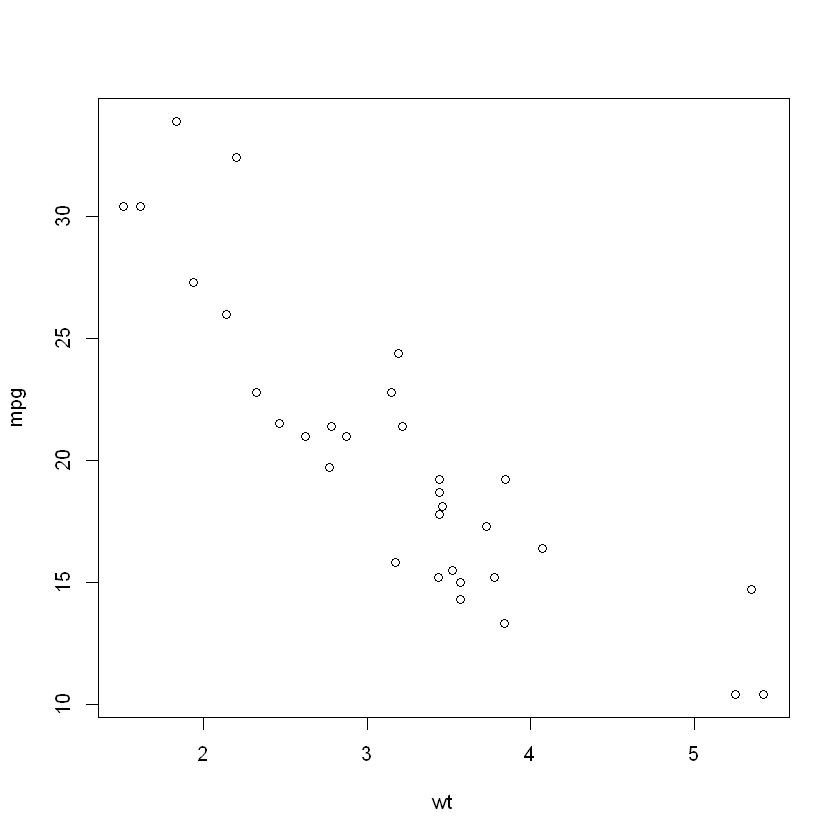

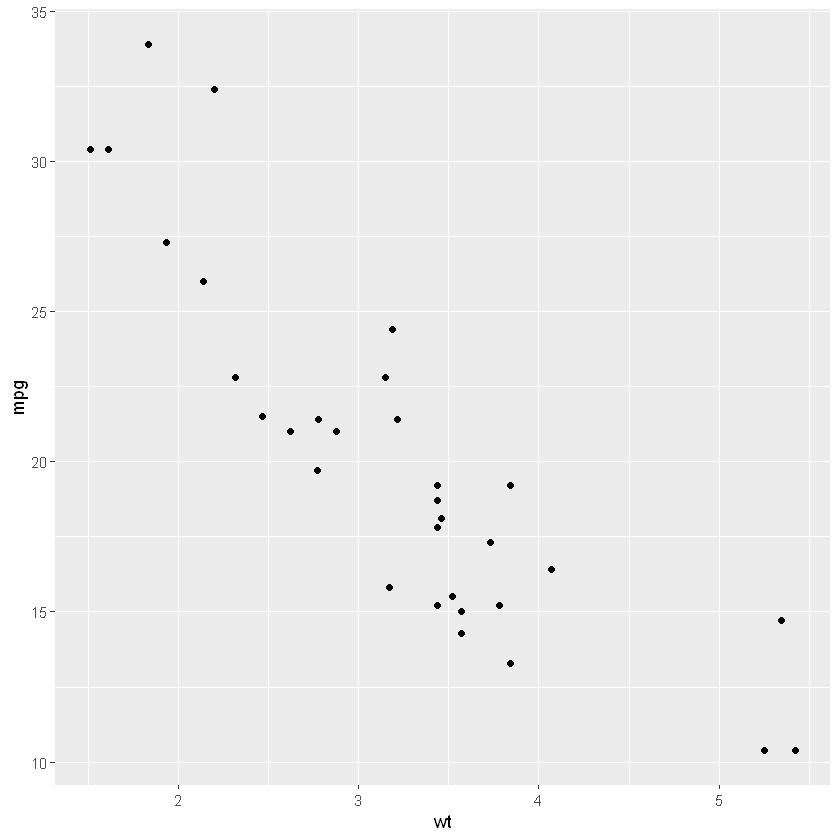

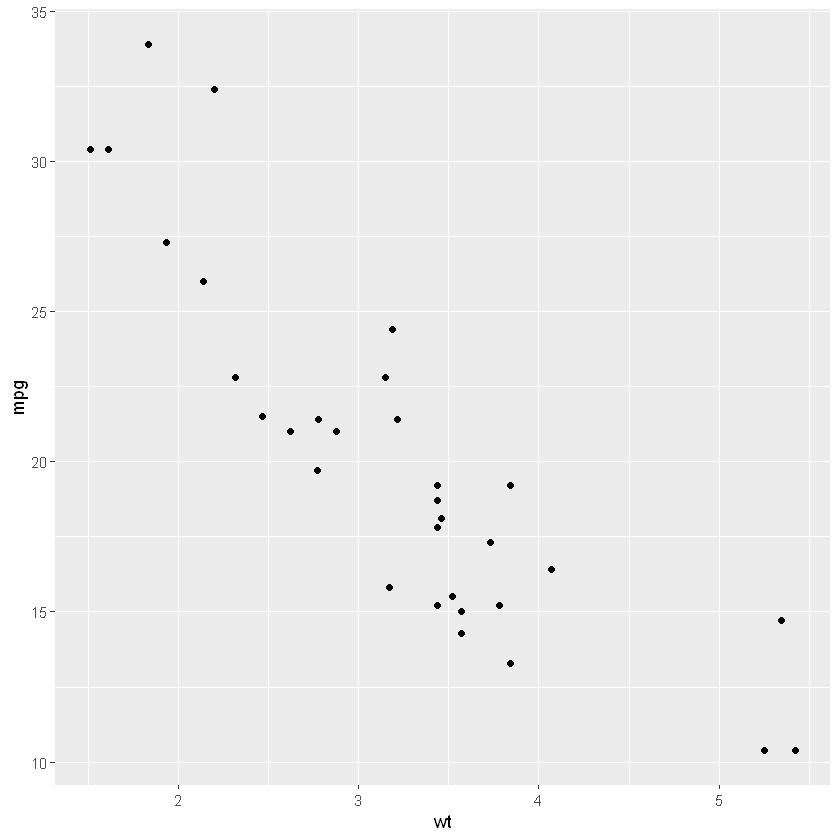

In [64]:
# The old way (shown)
plot(mpg ~ wt, data = mtcars) # formula notation
with(mtcars, plot(wt, mpg)) # x, y notation

# Using ggplot:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point()

# Using qplot:
qplot(wt , mpg, data = mtcars)


## geom_dotplot
Scatter plots:
    Continuous x, continuous y.
<br>Dot plots:
    Categorical x, continuous y.
<br>The difference is that unlike geom_point(), geom_dotplot() uses a binning statistic. Binning means to cut up a continuous variable into discrete "bins". 

[1] "factor"

[1] "factor"

[1] "numeric"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


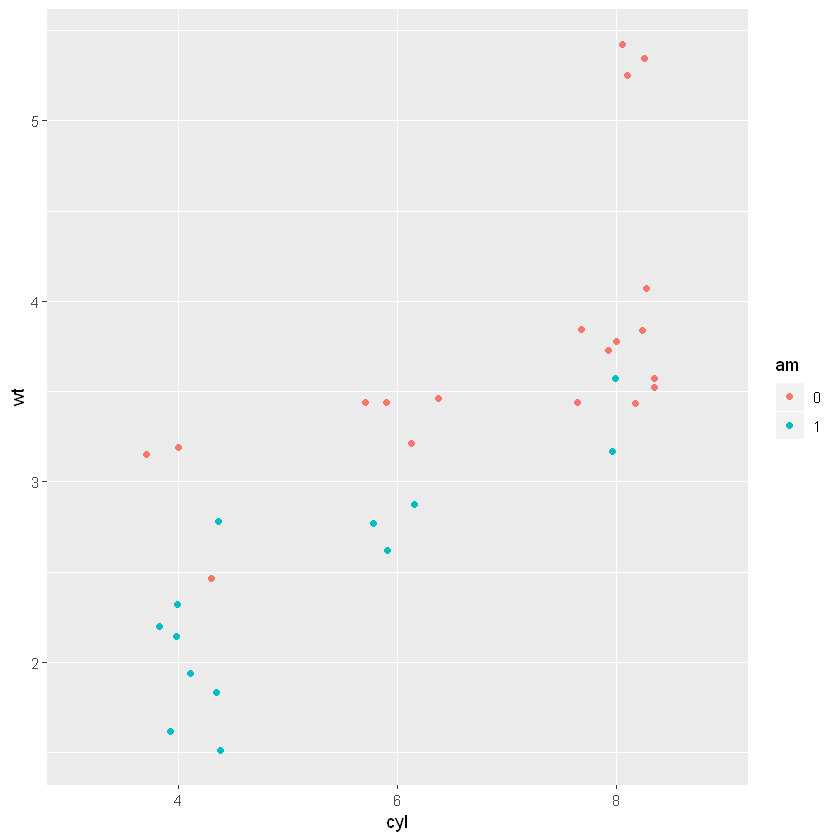

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


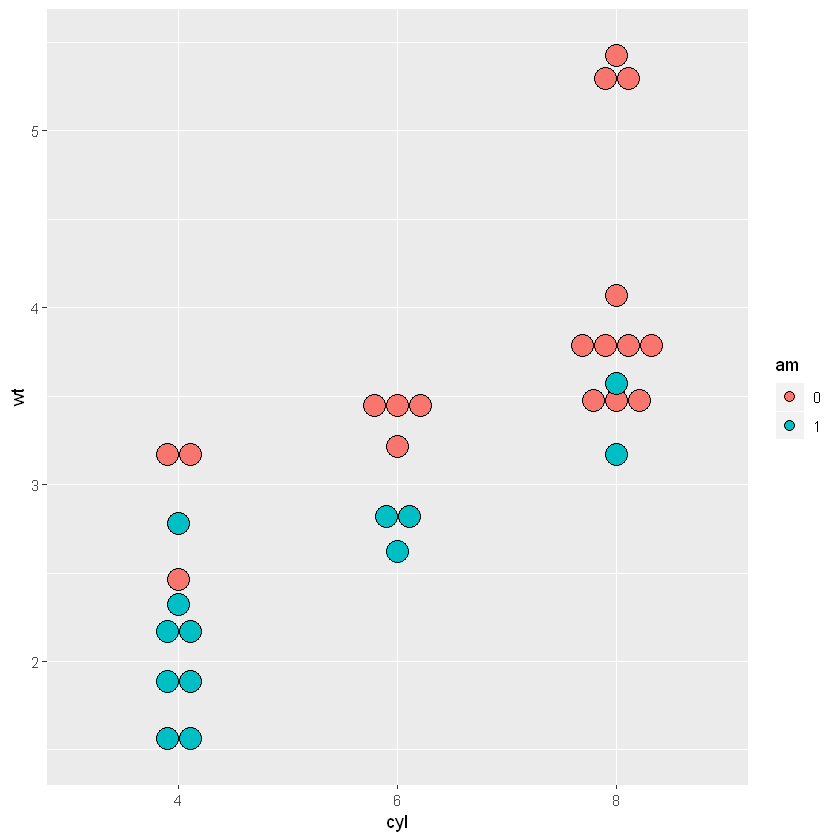

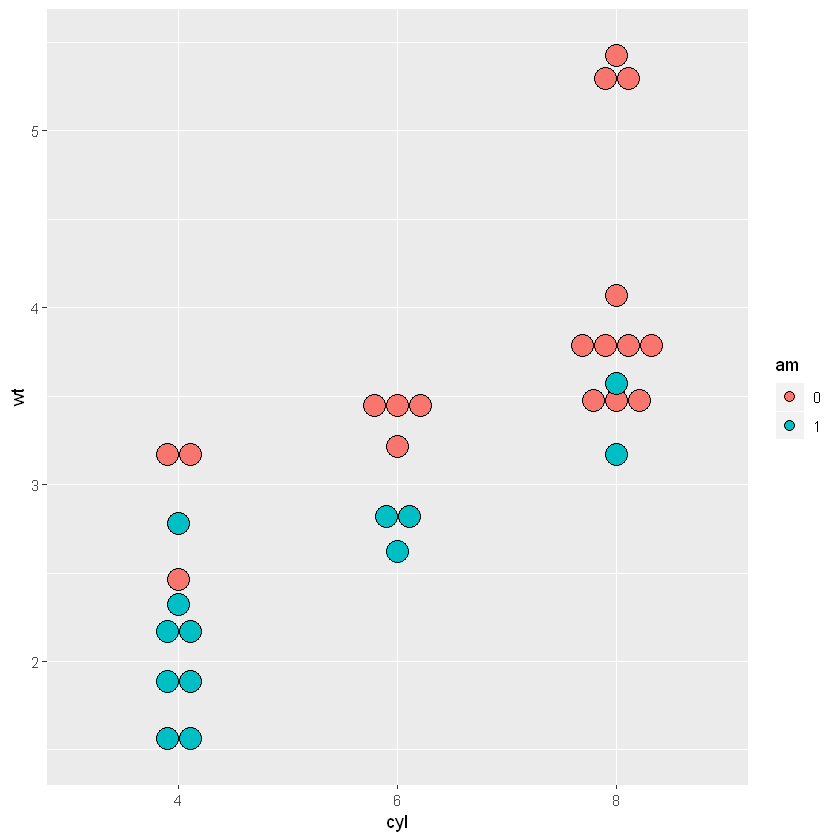

In [65]:
# cyl and am are factors, wt is numeric
class(mtcars$cyl)
class(mtcars$am)
class(mtcars$wt)

# "Basic" dot plot, with geom_point():
ggplot(mtcars, aes(cyl, wt, col = am)) +
  geom_point(position = position_jitter(0.2, 0))

# 1 - "True" dot plot, with geom_dotplot():
ggplot(mtcars, aes(cyl, wt, fill = am)) +
  geom_dotplot(binaxis = "y", stackdir = "center")

# 2 - qplot with geom "dotplot", binaxis = "y" and stackdir = "center"
qplot(
  cyl, wt,
  data = mtcars,
  fill = am,
  geom = "dotplot",
  binaxis = "y",
  stackdir = "center"
)